In [28]:
from __future__ import division


import pandas as pd
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import Counter
from collections import defaultdict

df = pd.read_csv("N-L-ID,N=1000-27.csv", delimiter=",")

Node = list(df['Node'])
Level= list(df['Level'])
N_ID= list(df['Node-ID'])
Cl_ID= list(df['Cluster-ID'])

In [29]:
bf=list(zip(Node,N_ID,Level,Cl_ID))

In [30]:
#updating rules for small group in level 1
#find all clusters with size smaller than 3
from collections import Counter

update_small=[]
cl_id=[x[3] for x in bf if x[2]==1 and str(x[3]).startswith('1')]
clusters=Counter(cl_id)
vals=list(clusters.values())
key=list(clusters.keys())

for i in range(len(vals)):
    if vals[i]<5:
        update_small.append(key[i])
        #print(key[i])

In [31]:
leaders_l1=[x for x in bf if x[2]==2 and str(x[3]).startswith('1')]
leaders_l2=[x for x in bf if x[2]==2 and str(x[3]).startswith('2')]
lis_lead=[]
for leader in leaders_l1:
    dd=[x[3] for x in leaders_l2 if x[0]==leader[0]]
    lis_lead.append((leader[0],leader[3],dd[0]))
#print(list(set(lis_lead)))

In [32]:
#move-up all small clusters 
for item in update_small:
    tt=[x[3] for x in  bf].index(item)
    zz=[x[1] for x in  lis_lead].index(item)
    #print(bf[tt])
    bf[tt]=(bf[tt][0],int(str(222)+str(bf[tt][1])),2,lis_lead[zz][2])
    #print(bf[tt])

In [33]:
#for item in leaders_l1:
     #bf.remove(item)

In [34]:
#updating rules for small group in level 3
#find all clusters with size smaller than 3
from collections import Counter

update_small=[]
cl_id=[x[3] for x in bf if x[2]==2 and str(x[3]).startswith('2')]
clusters=Counter(cl_id)
vals=list(clusters.values())
key=list(clusters.keys())

for i in range(len(vals)):
    if vals[i]<4 and vals[i]>2:
        update_small.append(key[i])
        

In [35]:
leaders_l3=[x for x in bf if x[2]==3 and str(x[3]).startswith('2')]
leaders_l4=[x for x in bf if x[2]==3 and str(x[3]).startswith('3')]
#print(leaders_l3)
#print(leaders_l4)

In [36]:
lis_lead=[]
for leader in leaders_l3:
    dd=[x[3] for x in leaders_l4 if x[0]==leader[0]]
    lis_lead.append((leader[0],leader[3],dd[0]))
print(list(set(lis_lead)))

[(0.3542786283302767, 223, 31), (0.453312648558235, 27, 37), (0.215023309071196, 213, 36), (0.9433701380953928, 224, 33), (0.21528577294179493, 216, 36), (0.21424121155737091, 23, 36), (0.2134241191305304, 220, 36), (0.4612972995398693, 22, 37), (0.9047394200925378, 24, 32), (0.8521232823553192, 25, 38), (0.4620927658350549, 219, 37), (0.4524663368337418, 218, 37), (0.5421678292053486, 210, 30), (0.4612523868095159, 212, 37), (0.214887193713118, 26, 36), (0.4610016611748987, 221, 37), (0.4698397017562452, 28, 37), (0.9583921202333358, 211, 33), (0.9188391513484044, 21, 32), (0.14825770515820733, 29, 39), (0.28027311511182856, 20, 35), (0.4697105717307279, 217, 37), (0.21457081209308024, 222, 36), (0.9056721170834514, 225, 32), (0.2153727815530227, 226, 36), (0.8519610454313743, 214, 38)]


In [37]:
#move-up all small clusters 
for item in update_small:
    tt=[x[3] for x in  bf].index(item)
    zz=[x[1] for x in  lis_lead].index(item)
    #print(bf[tt])
    bf[tt]=(bf[tt][0],int(str(33)+str(bf[tt][1])),3,lis_lead[zz][2])
    #print(bf[tt])

In [42]:
Edge_prob=[]
for ii in range(0,len(bf)): 
        for j in range(0,len(bf)):
            
            if bf[ii][3]==bf[j][3] and bf[ii][2]-bf[j][2]==1:
                
                xx=(bf[ii][1],bf[j][1])
                Edge_prob.append(xx)
                #print(xx)
         
            elif bf[ii][3]==bf[j][3] and bf[ii][2]-bf[j][2]==0:
                 if bf[ii][1]-bf[j][1]>0 and bf[ii][2]>0:
                    xx=(bf[ii][1],bf[j][1])
                    Edge_prob.append(xx)
                    #print (xx)
            elif ii!=j and bf[ii][2]!=bf[j][2]:
                delta_level=bf[ii][2]-bf[j][2]
                delta_ability=abs(bf[ii][0]-bf[j][0])
                beta=10**(6)
                alpha=1
                 #print delta_level,beta*(delta_ability**alpha),bf[ii][0],bf[j][0],bf[ii][3],bf[j][3]
                p=1.0*(1)/(delta_level+beta*(delta_ability**alpha))
                 #random.seed(random.randint(0,1000))
                Probability=random.uniform(0.0, 1.0)#b
                if p>Probability:
                    xx=(bf[j][1],bf[ii][1])
                    Edge_prob.append(xx)

In [43]:
import csv
with open('arule.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['Source','Target'])
    for row in Edge_prob:
        csv_out.writerow(row) 

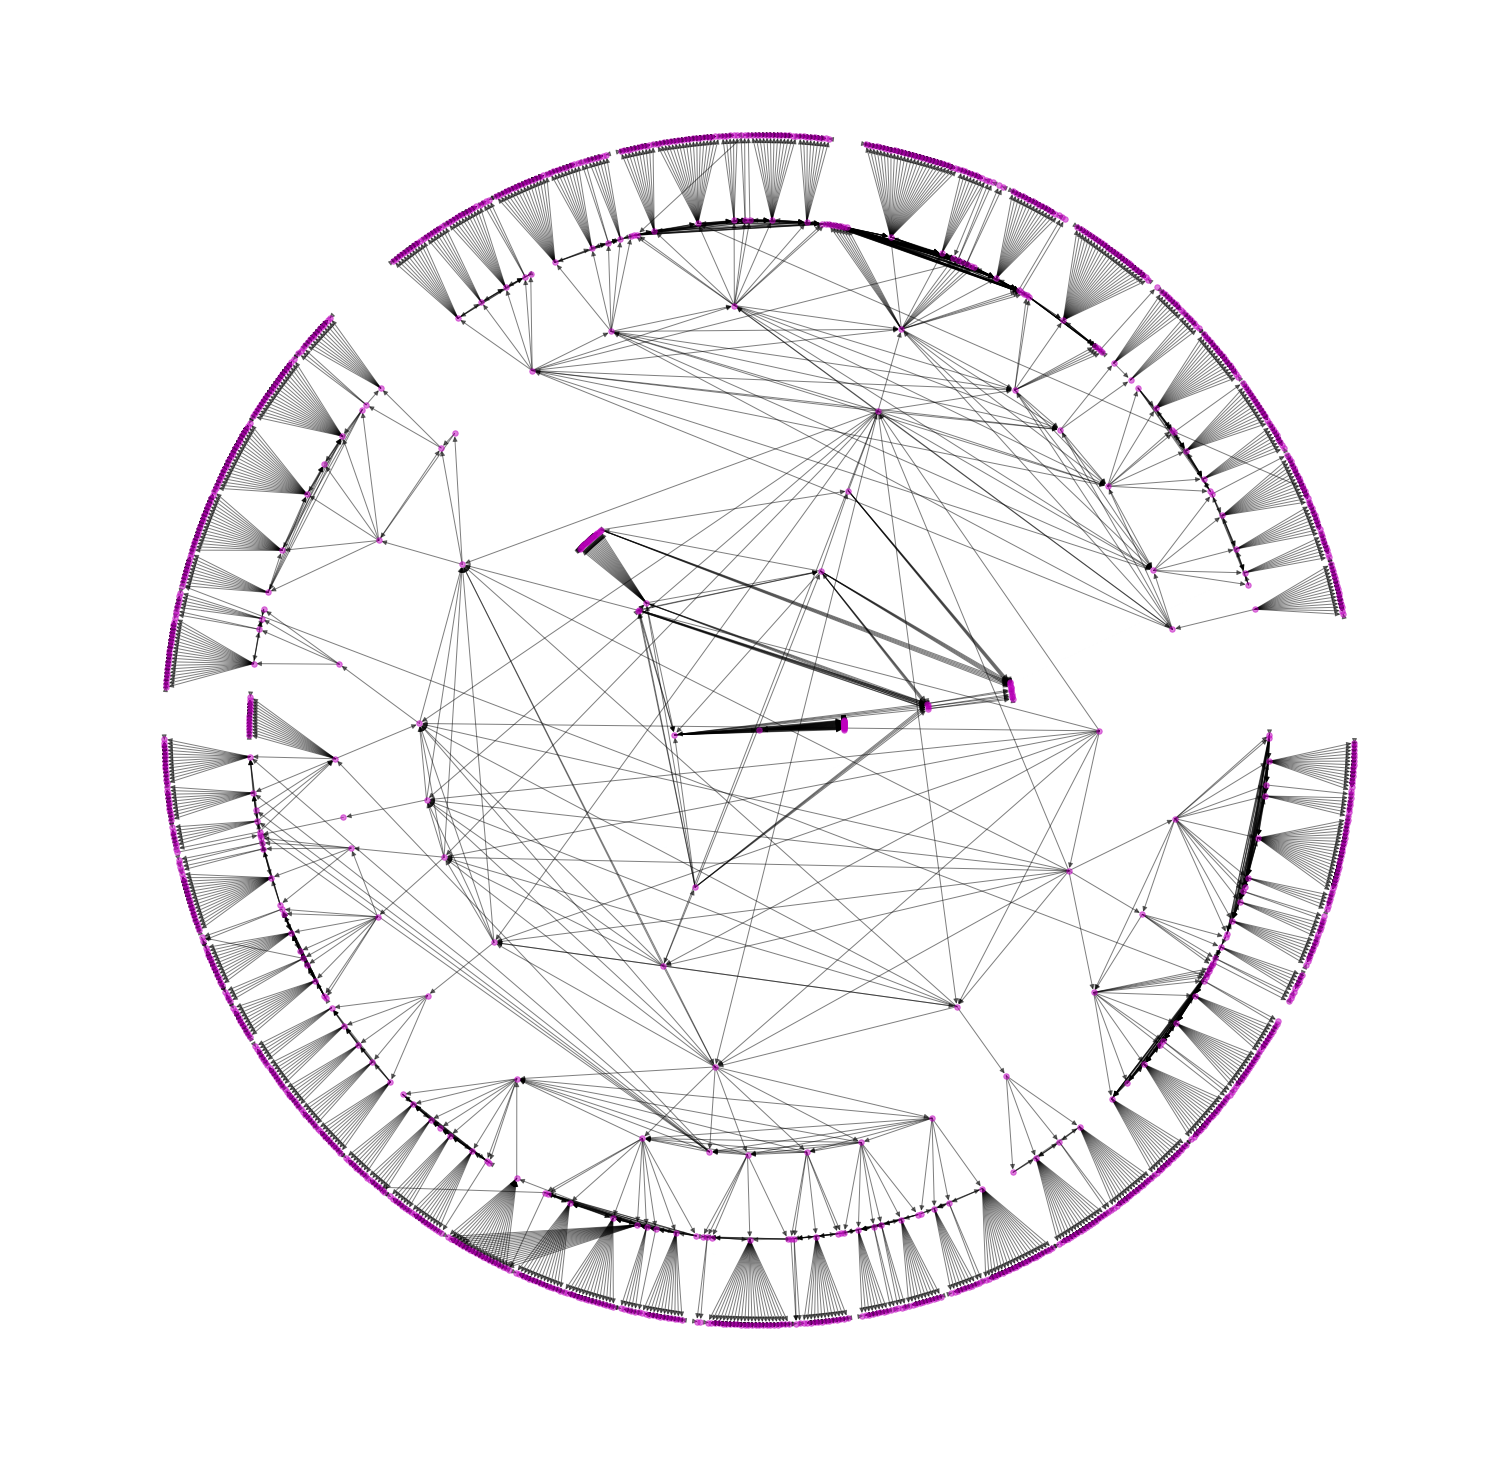

In [44]:
import matplotlib.pyplot as plt
import networkx as nx
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

G = nx.DiGraph()
G.add_edges_from(Edge_prob)
plt.figure(figsize=(20, 20))
# use graphviz to find radial layout
pos = graphviz_layout(G, prog="twopi")
# draw nodes, coloring by rtt ping time
nx.draw(G, pos,with_labels=False,node_color="m",alpha=0.5,node_size=30)
    # adjust the plot limits
xmax = 1.02 * max(xx for xx, yy in pos.values())
ymax = 1.02 * max(yy for xx, yy in pos.values())
#plt.xlim(0, xmax)
#plt.ylim(0, ymax)
plt.axis('equal')
plt.savefig('N-1000-circular_tree.png')
plt.show()#b

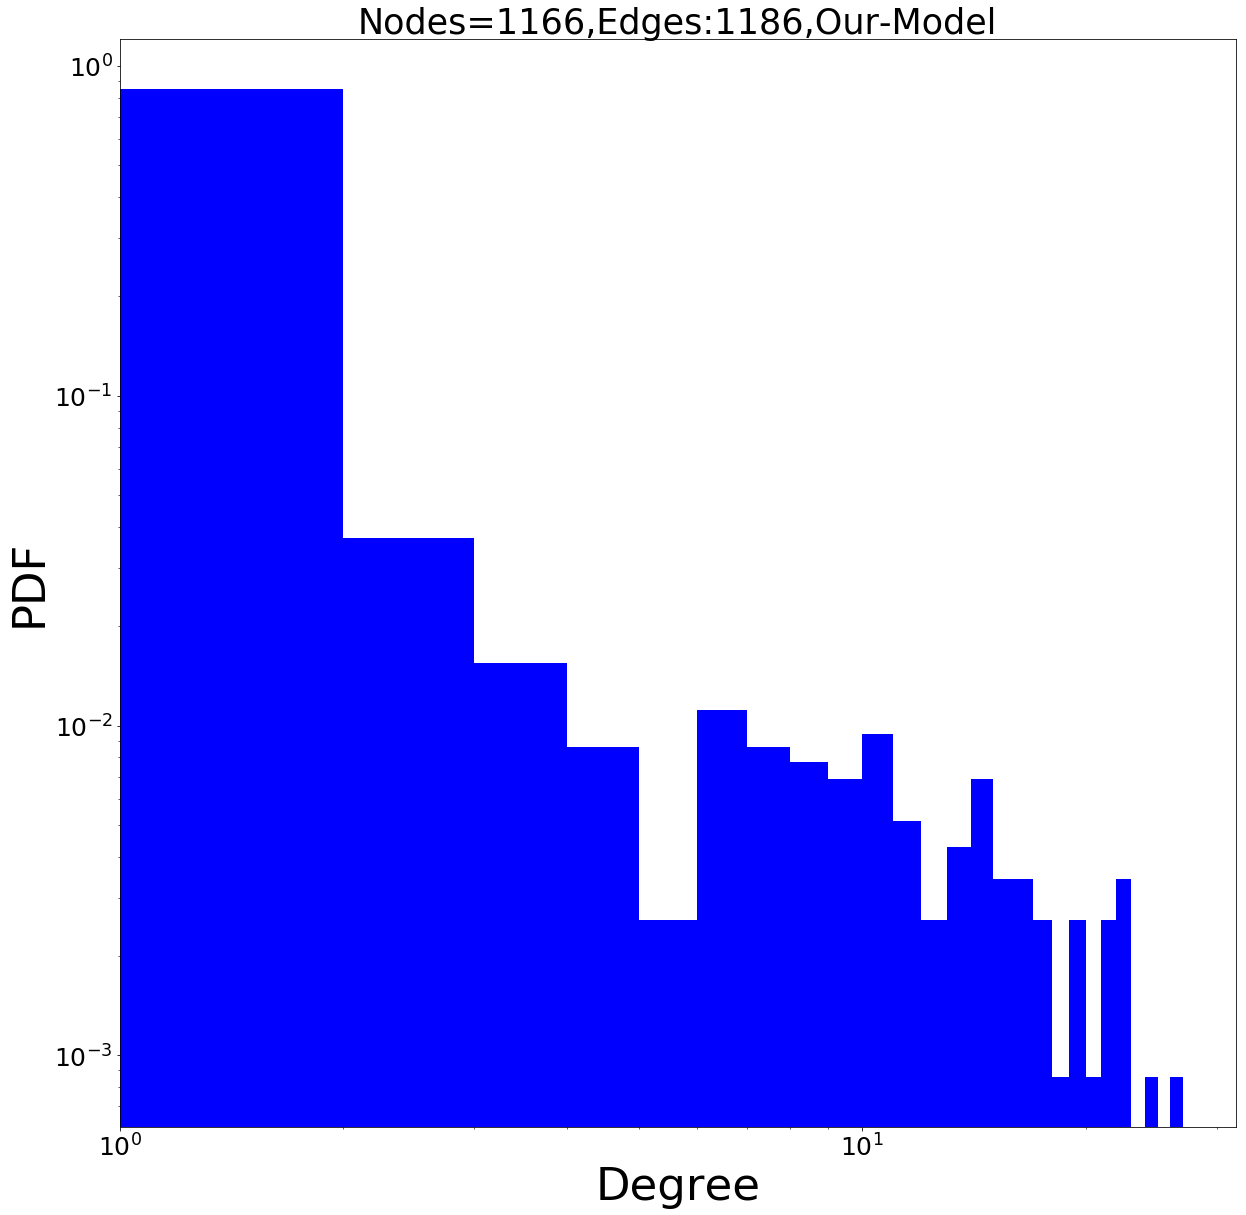

In [41]:
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

st=[x[0] for x in Edge_prob]+[x[1] for x in Edge_prob]
st=list(set(st))
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20, 20))
ll=sorted(degree_sequence)
count, bins, ignored = plt.hist(ll,np.arange(min(ll), max(ll)), density=True,color='b')
plt.title("Degree Histogram")
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlim(left=1)
plt.xlabel('Degree',fontsize=45)
plt.ylabel('PDF',fontsize=45)
plt.title('Nodes='+str(len(st))+',Edges:'+str(len(Edge_prob))+',Our-Model',fontsize=35)
plt.tick_params(axis='both', which='major', labelsize=25)
plt.tick_params(axis='both', which='minor', labelsize=25)
plt.savefig('Degree-International-Department.png')
plt.show()